
# Trabalho 2 de Inteligência  de negócios

### Alunos
*   Anne Caroline Silva
*   Marcelo P. Mendes


In [ ]:
!pip install xlrd==1.2.0
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

     |████████████████████████████████| 103 kB 7.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


## Análise exploratória

### carregamento de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
FOLDER_PATH = '/content/drive/MyDrive/datasets'
df = pd.read_excel(f'{FOLDER_PATH}/CTG.xls',sheet_name='Raw Data',header=0).drop(index=[0,2127,2128,2129]).drop(labels=["FileName","SegFile","Date"],axis=1)

Mounted at /content/drive


In [ ]:
df.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


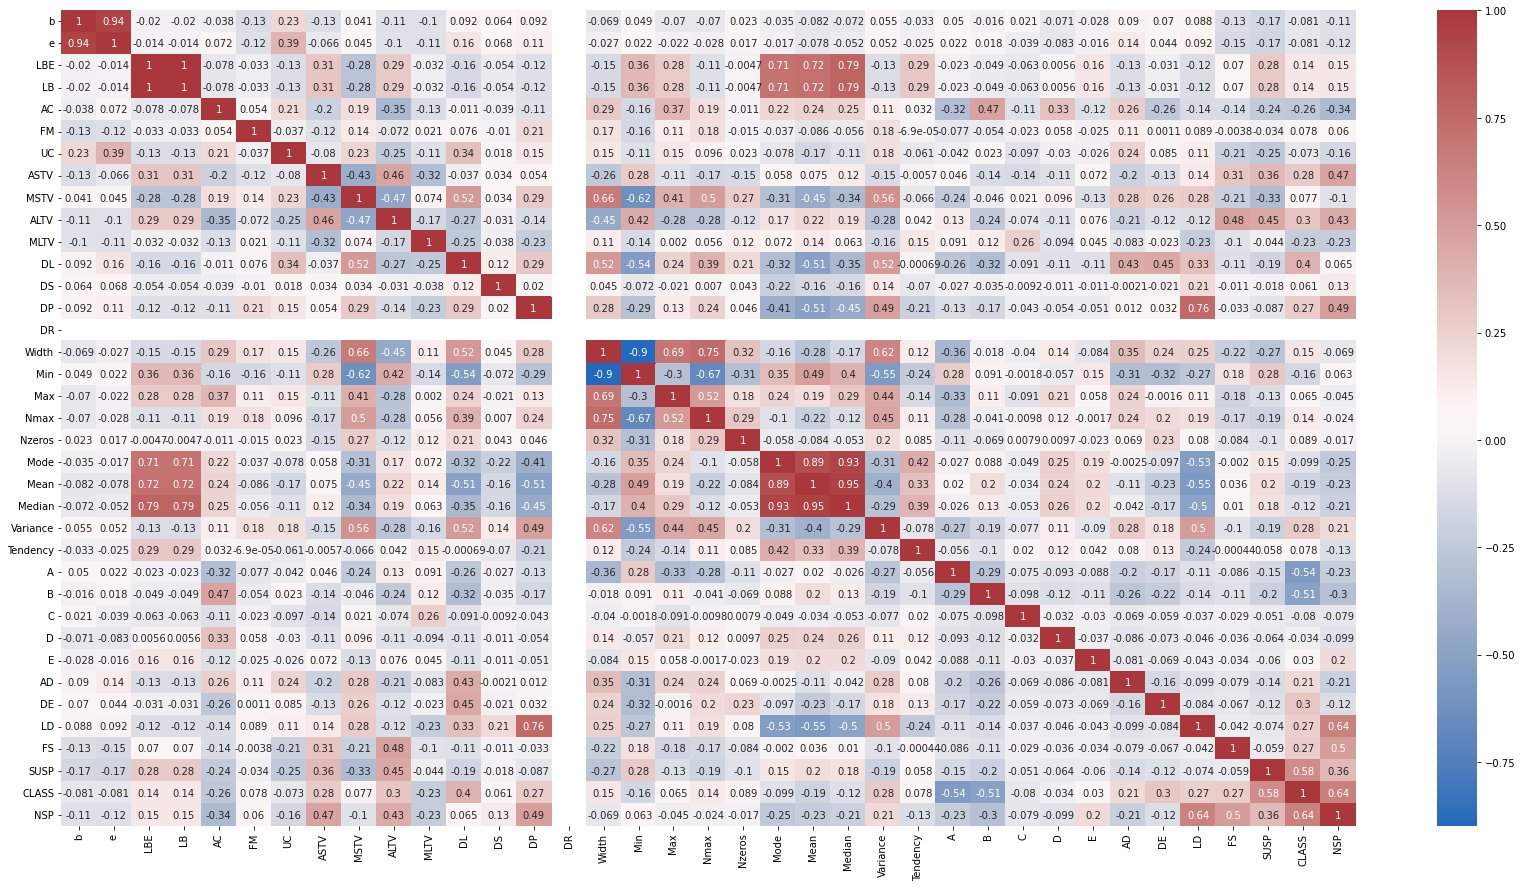

In [ ]:
df_corr = df
fig, ax = plt.subplots(figsize=(29, 15))
sns.color_palette("vlag", as_cmap=True)
sns.heatmap(df_corr.corr(),annot=True,cmap='vlag')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('NSP',axis=1)
y = df['NSP']

In [ ]:
knn = pd.DataFrame()
split = 10
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
kfold  = KFold(n_splits = split, shuffle=True,random_state=42)
knn[3] = cross_val_score(knn3, X, y, cv = kfold) 

In [ ]:
knn5 =  KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
kfold  = KFold(n_splits=split, shuffle=True,random_state=1)
knn[5] = cross_val_score(knn5, X, y, cv = kfold) 

In [ ]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train,y_train)
kfold  = KFold(n_splits=split, shuffle=True,random_state=1)
knn[7] = cross_val_score(knn7, X, y, cv = kfold) 

In [ ]:
knn9 =  KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train,y_train)
kfold  = KFold(n_splits=split, shuffle=True,random_state=1)
knn[9] = cross_val_score(knn9, X, y, cv = kfold) 

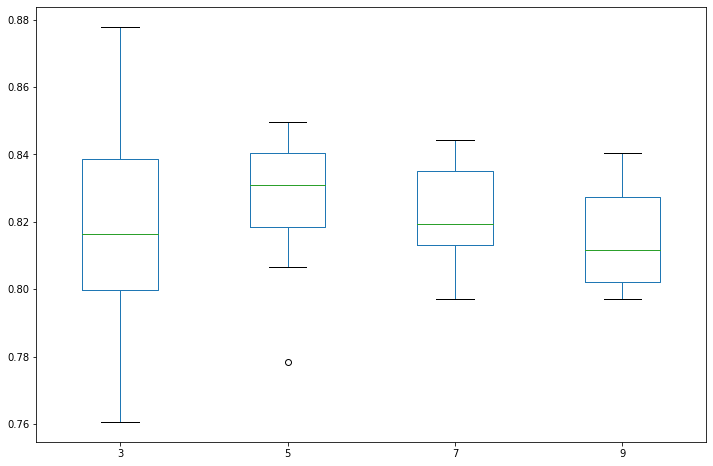

In [ ]:
knn.boxplot(figsize=(12,8),grid=False)

In [ ]:
from sklearn import metrics
lst_knn = []

In [ ]:
for i in [(knn3,3),(knn5,5),(knn7,7),(knn9,9)]:
    algortimo=i[0]
    param=i[1]
    y_pred = algortimo.predict(X_test)

    lst_knn.append(['knn '+str(param),'Accuracy',metrics.accuracy_score(y_test, y_pred)*100])
    lst_knn.append(['knn '+str(param),'Precision macro:', metrics.precision_score(y_test, y_pred,average='macro')*100])
    lst_knn.append(['knn '+str(param),'Precision micro:', metrics.precision_score(y_test, y_pred,average='micro')*100])
    lst_knn.append(['knn '+str(param),'Recall macro:', metrics.recall_score(y_test, y_pred,average='macro')*100])
    lst_knn.append(['knn '+str(param),'Recall micro:', metrics.recall_score(y_test, y_pred,average='micro')*100])


In [ ]:
lst_knn

[['knn 3', 'Accuracy', 80.56426332288402],
 ['knn 3', 'Precision macro:', 62.70858770858771],
 ['knn 3', 'Precision micro:', 80.56426332288402],
 ['knn 3', 'Recall macro:', 51.98853972730082],
 ['knn 3', 'Recall micro:', 80.56426332288402],
 ['knn 5', 'Accuracy', 81.6614420062696],
 ['knn 5', 'Precision macro:', 69.6353867488265],
 ['knn 5', 'Precision micro:', 81.6614420062696],
 ['knn 5', 'Recall macro:', 50.92467989914648],
 ['knn 5', 'Recall micro:', 81.6614420062696],
 ['knn 7', 'Accuracy', 82.60188087774296],
 ['knn 7', 'Precision macro:', 75.22703028191185],
 ['knn 7', 'Precision micro:', 82.60188087774296],
 ['knn 7', 'Recall macro:', 49.133176496249156],
 ['knn 7', 'Recall micro:', 82.60188087774296],
 ['knn 9', 'Accuracy', 82.2884012539185],
 ['knn 9', 'Precision macro:', 78.02706552706553],
 ['knn 9', 'Precision micro:', 82.2884012539185],
 ['knn 9', 'Recall macro:', 47.20164925619234],
 ['knn 9', 'Recall micro:', 82.2884012539185]]

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = df.drop('NSP',axis=1)
y = df['NSP']
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
dt = pd.DataFrame()
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt_gini.fit(X_train,y_train)
kfold  = KFold(n_splits=split, shuffle=True,random_state=1)
dt['gini'] = cross_val_score(dt_gini, X, y, cv = kfold) 

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt_entropy.fit(X_train,y_train)
kfold  = KFold(n_splits=split, shuffle=True,random_state=1)
dt['entropy'] = cross_val_score(dt_entropy, X, y, cv = kfold) 

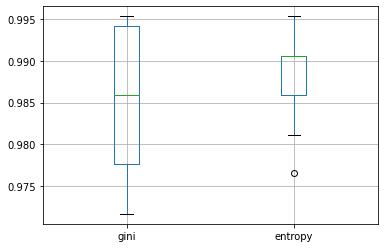

In [ ]:
dt.boxplot()

In [ ]:
from sklearn import metrics
lst_dt = []

In [ ]:
for i in [(dt_gini,'gini'),(dt_entropy,'entropy')]:
    
    algortimo = i[0]
    param = i[1]
    y_pred = algortimo.predict(X_test)

    lst_dt.append(['decision_tree '+param,'Accuracy',metrics.accuracy_score(y_test, y_pred)*100])
    lst_dt.append(['decision_tree '+param,'Precision macro:', metrics.precision_score(y_test, y_pred,average='macro')*100])
    lst_dt.append(['decision_tree '+param,'Precision micro:', metrics.precision_score(y_test, y_pred,average='micro')*100])
    lst_dt.append(['decision_tree '+param,'Recall macro:', metrics.recall_score(y_test, y_pred,average='macro')*100])
    lst_dt.append(['decision_tree '+param,'Recall micro:', metrics.recall_score(y_test, y_pred,average='micro')*100])

In [ ]:
lst_dt

[['decision_tree gini', 'Accuracy', 98.11912225705329],
 ['decision_tree gini', 'Precision macro:', 97.39792749501488],
 ['decision_tree gini', 'Precision micro:', 98.11912225705329],
 ['decision_tree gini', 'Recall macro:', 97.13360104696544],
 ['decision_tree gini', 'Recall micro:', 98.11912225705329],
 ['decision_tree entropy', 'Accuracy', 98.43260188087774],
 ['decision_tree entropy', 'Precision macro:', 98.50333696867433],
 ['decision_tree entropy', 'Precision micro:', 98.43260188087774],
 ['decision_tree entropy', 'Recall macro:', 96.74235224466585],
 ['decision_tree entropy', 'Recall micro:', 98.43260188087774]]

### Árvore gini

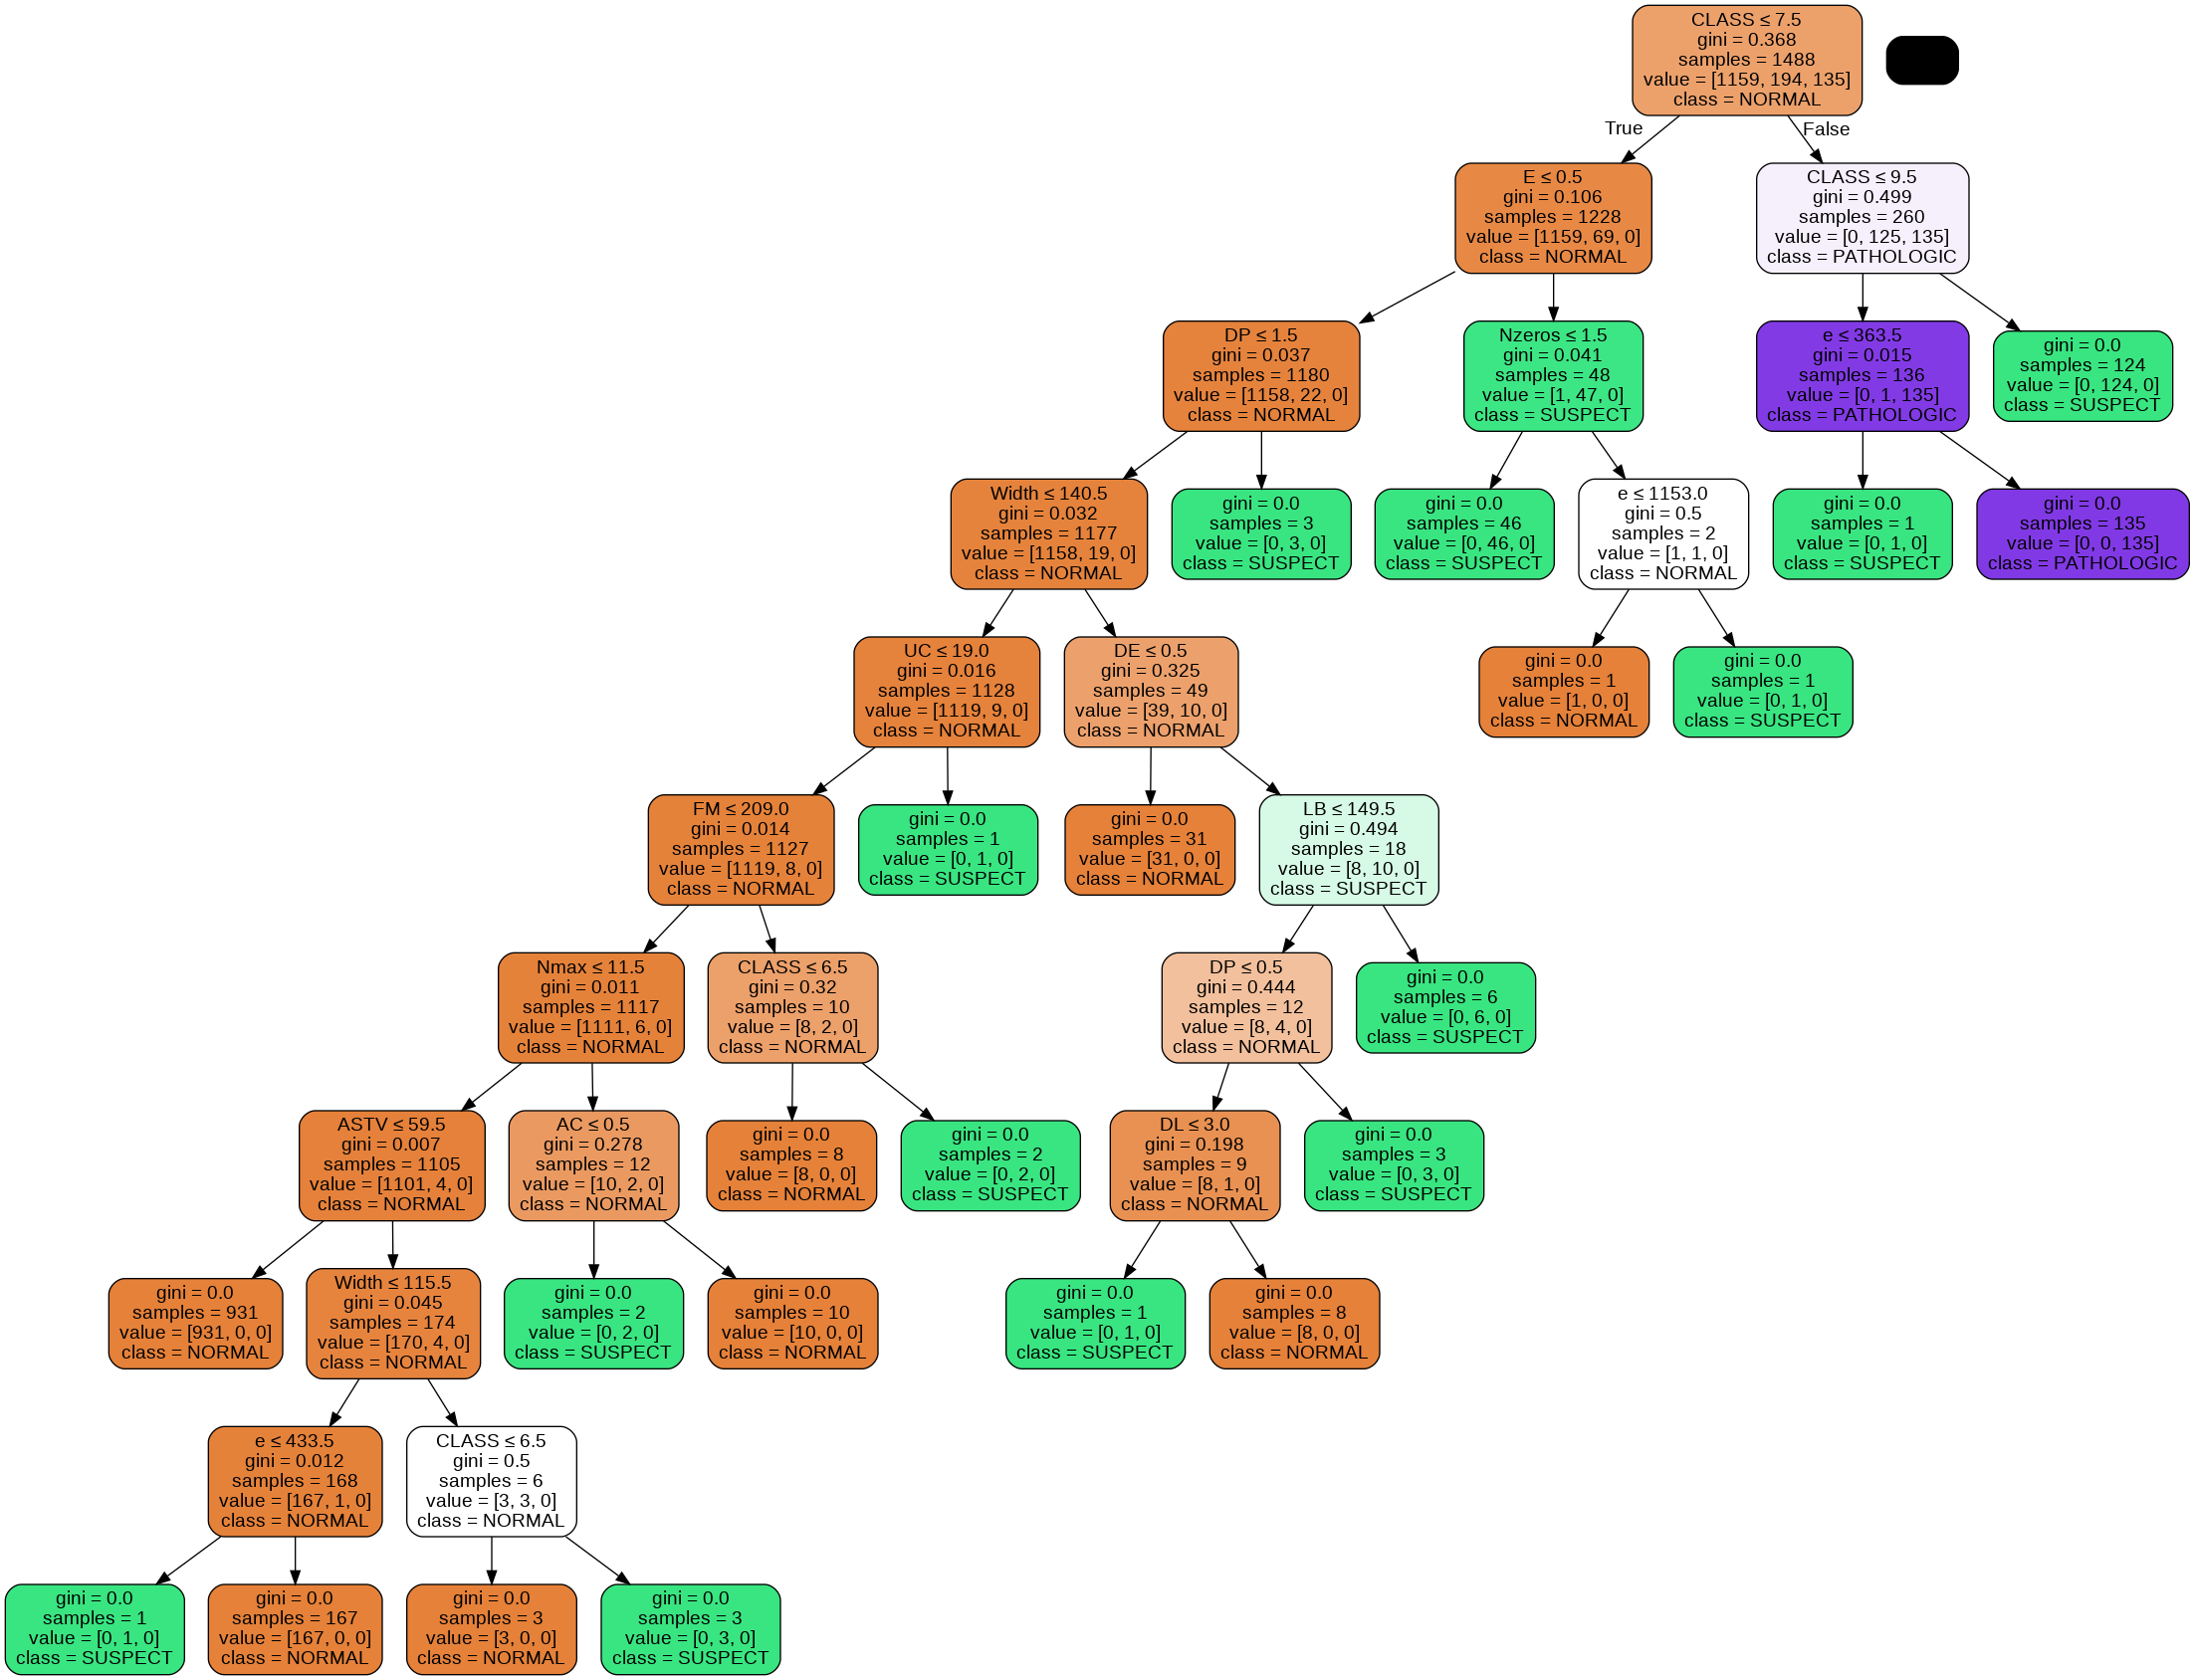

In [ ]:
#Desenho de gráfico
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus


#print("Melhor hyper-parametro:", grid_dt_gini.best_params_)
tree = dt_gini
target_names  = ['NORMAL', 'SUSPECT', 'PATHOLOGIC']

dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names  = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Árvore entropy

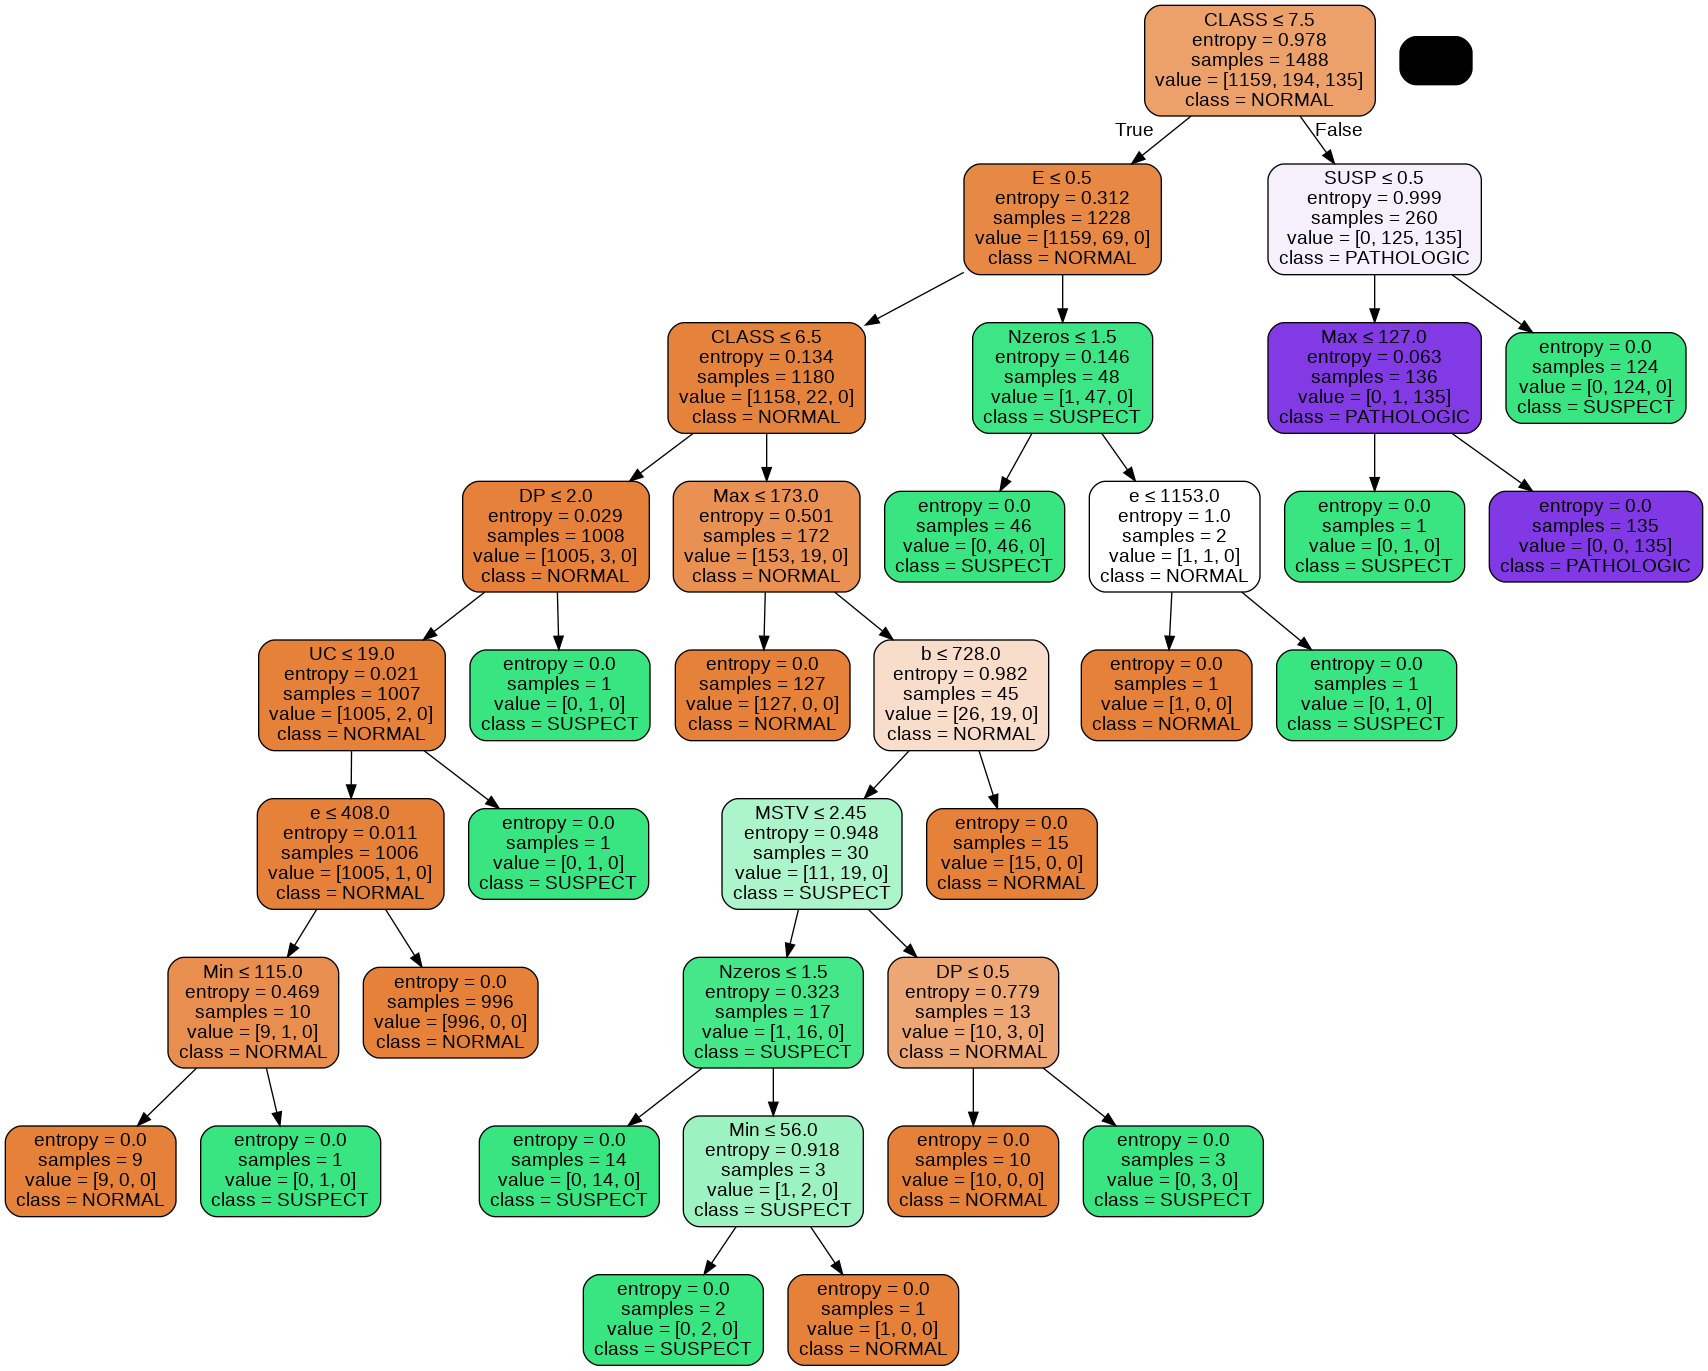

In [ ]:
tree = dt_entropy
target_names  = ['NORMAL', 'SUSPECT', 'PATHOLOGIC']

dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names  = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## SVM 

In [ ]:
from sklearn.svm import SVC
X = df.drop('NSP',axis=1)
y = df['NSP']
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

df_svc = pd.DataFrame()

In [ ]:
clf_svm_linear = SVC(kernel = 'linear')
clf_svm_linear.fit(X_train,y_train)
kfold  = KFold(n_splits=split, shuffle=True,random_state=1)
df_svc['linear'] = cross_val_score(clf_svm_linear, X, y, cv = kfold) 

KeyboardInterrupt: ignored

In [ ]:
clf_svm_rbf = SVC(kernel = 'rbf')
clf_svm_rbf.fit(X_train,y_train)
kfold  = KFold(n_splits=split, shuffle=True,random_state=1)
df_svc['rbf'] = cross_val_score(clf_svm_rbf, X, y, cv = kfold) 

In [ ]:
df_svc.boxplot()

In [ ]:
from sklearn import metrics
lst_svm = []

In [ ]:
for i in [(clf_svm_linear,'linear'),(clf_svm_rbf,'rbf')]:
    
    algortimo = i[0]
    param = i[1]
    y_pred = algortimo.predict(X_test)

    lst_svm.append(['SVM '+param,'Accuracy',metrics.accuracy_score(y_test, y_pred)*100])
    lst_svm.append(['SVM '+param,'Precision macro:', metrics.precision_score(y_test, y_pred,average='macro')*100])
    lst_svm.append(['SVM '+param,'Precision micro:', metrics.precision_score(y_test, y_pred,average='micro')*100])
    lst_svm.append(['SVM '+param,'Recall macro:', metrics.recall_score(y_test, y_pred,average='macro')*100])
    lst_svm.append(['SVM '+param,'Recall micro:', metrics.recall_score(y_test, y_pred,average='micro')*100])

In [ ]:
lst_svm

## Resultados

In [ ]:
ml_result = lst_dt + lst_svm + lst_knn
df_result = pd.DataFrame(ml_result,columns=['algoritmo','metrica','valor'])


In [ ]:
df_result.sort_values('valor',axis=0,ascending=False)

,algoritmo,metrica,valor
0,decision_tree gini,Accuracy,98.275862
2,decision_tree gini,Precision micro:,98.275862
4,decision_tree gini,Recall micro:,98.275862
7,decision_tree entropy,Precision micro:,97.962382
14,SVM linear,Recall micro:,97.962382
12,SVM linear,Precision micro:,97.962382
9,decision_tree entropy,Recall micro:,97.962382
10,SVM linear,Accuracy,97.962382
5,decision_tree entropy,Accuracy,97.962382
6,decision_tree entropy,Precision macro:,97.531459


In [ ]:
teste = df_result.sort_values('valor',axis=0,ascending=False).to_latex(index=False)

In [ ]:
teste

'\\begin{tabular}{llr}\n\\toprule\n             algoritmo &           metrica &      valor \\\\\n\\midrule\n    decision\\_tree gini &          Accuracy &  98.275862 \\\\\n    decision\\_tree gini &  Precision micro: &  98.275862 \\\\\n    decision\\_tree gini &     Recall micro: &  98.275862 \\\\\n decision\\_tree entropy &  Precision micro: &  97.962382 \\\\\n            SVM linear &     Recall micro: &  97.962382 \\\\\n            SVM linear &  Precision micro: &  97.962382 \\\\\n decision\\_tree entropy &     Recall micro: &  97.962382 \\\\\n            SVM linear &          Accuracy &  97.962382 \\\\\n decision\\_tree entropy &          Accuracy &  97.962382 \\\\\n decision\\_tree entropy &  Precision macro: &  97.531459 \\\\\n    decision\\_tree gini &  Precision macro: &  97.486505 \\\\\n    decision\\_tree gini &     Recall macro: &  97.463634 \\\\\n            SVM linear &  Precision macro: &  97.034949 \\\\\n decision\\_tree entropy &     Recall macro: &  96.540739 \\\\\n    

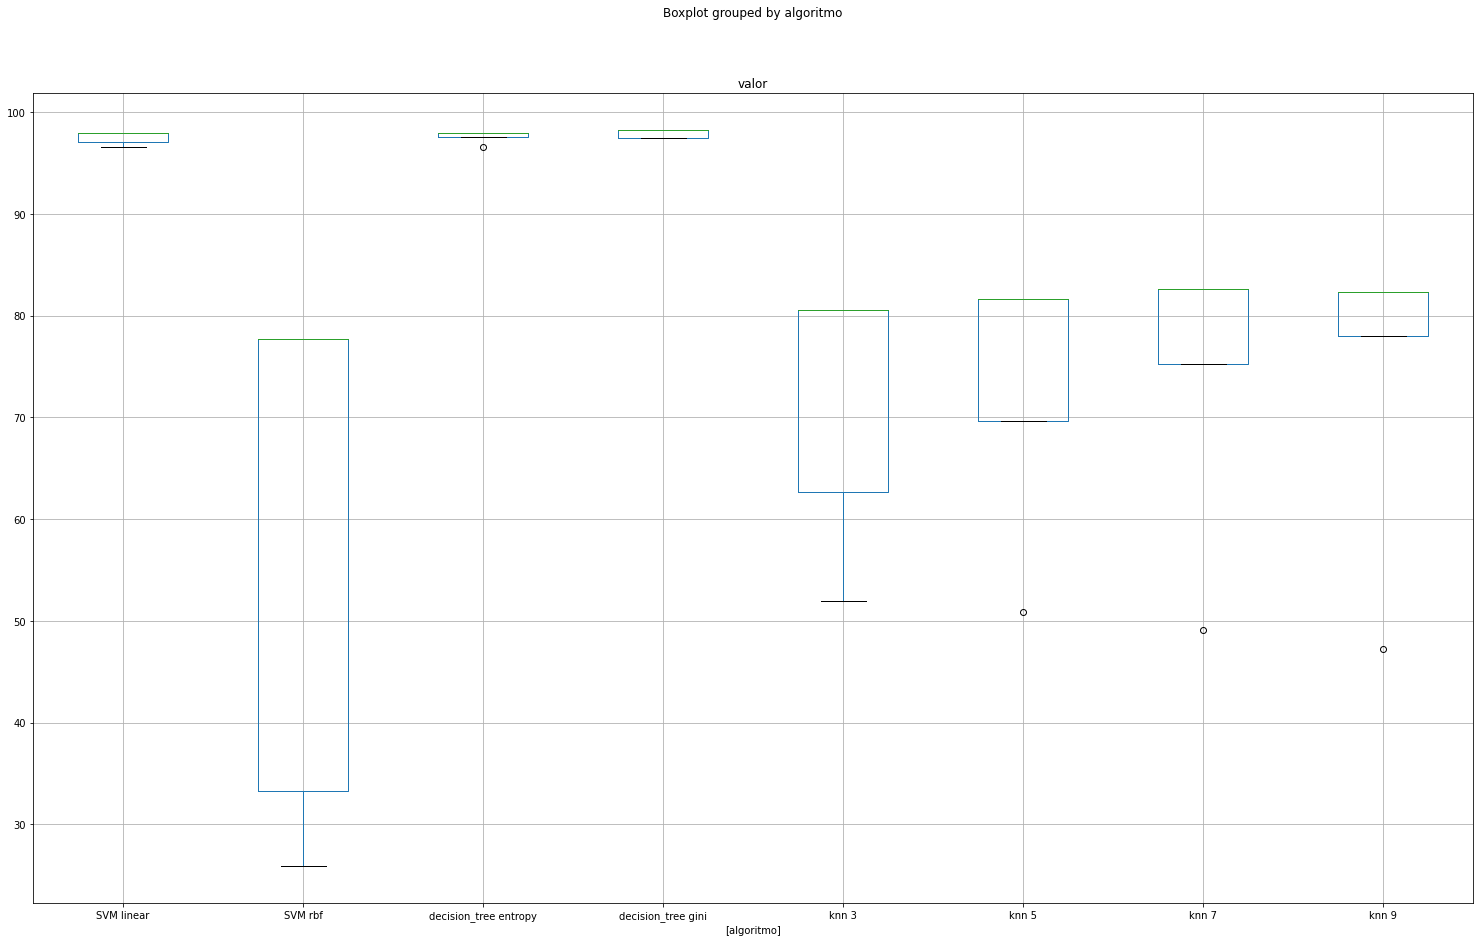

In [ ]:
df_result.boxplot(by='algoritmo', figsize=(25,15))

# Trabalho 2.1.
Dado a base de dados de exames ctg buscar os melhores hiper-parametros de cada um dos algortimos de classificação.
*  SVM
*  KNN 
*  Decision tree  

Para as métricas :

* Accuracy
* Recall
* Precision



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
k_fold = 5

In [ ]:
## scores
scores = ['accuracy','precision_macro','precision_micro','recall_macro', 'recall_micro']
## Parameters 
grid_search ={"KNN":{
    "algoritmo":KNeighborsClassifier(),
    "parametros": {
            "n_neighbors":range(3,31,2),
            "weights":["uniform","distance"],
            "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
            }
},"Decision Tree":{
    "algoritmo":DecisionTreeClassifier(),
    "parametros":{
        "criterion":["gini","entropy"],
        "splitter":["best","random"],
        "max_depth":[3,7,9,13,15],
    }
},"Random Forest":{
   "algoritmo":RandomForestClassifier(),
   "parametros":{
       "n_estimators":[100,300,500,1000,],
       "criterion":["gini","entropy"],
       "max_depth":[3,5,7,9]
   }
  }
}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7)
df_results = pd.DataFrame(columns=["algoritmo","score","parametros","value","k_fold"])
for algoritmo in grid_search:
    for s in scores:
        grid = GridSearchCV(
            grid_search[algoritmo]['algoritmo'],
            grid_search[algoritmo]["parametros"],
            scoring = s, cv = k_fold, n_jobs = -1)
        grid.fit(X_train,y_train)

        #
        aux=[]
        pos_best = list(grid.cv_results_['rank_test_score']).index(1)
        for i in range(k_fold):
            aux.append(grid.cv_results_[f"split{i}_test_score"][pos_best])
        #
        dicio = {
            "algoritmo":algoritmo,
            "score":s,
            "parametros":grid.best_params_,
            "value":grid.best_score_,
            "k_fold":aux,
            "modelo":grid.best_estimator_
            }    
        df_results=df_results.append(dicio,ignore_index=True)       

In [ ]:
df_results

,algoritmo,score,parametros,value,k_fold,modelo
0,KNN,accuracy,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.823924,"[0.8355704697986577, 0.8087248322147651, 0.828...",KNeighborsClassifier(weights='distance')
1,KNN,precision_macro,"{'algorithm': 'auto', 'n_neighbors': 17, 'weig...",0.810348,"[0.849645390070922, 0.8412464985994398, 0.7845...","KNeighborsClassifier(n_neighbors=17, weights='..."
2,KNN,precision_micro,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.823924,"[0.8355704697986577, 0.8087248322147651, 0.828...",KNeighborsClassifier(weights='distance')
3,KNN,recall_macro,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.552553,"[0.5838169329969162, 0.5624067844126718, 0.538...","KNeighborsClassifier(n_neighbors=3, weights='d..."
4,KNN,recall_micro,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.823924,"[0.8355704697986577, 0.8087248322147651, 0.828...",KNeighborsClassifier(weights='distance')
5,Decision Tree,accuracy,"{'criterion': 'entropy', 'max_depth': 7, 'spli...",0.985217,"[0.9832214765100671, 1.0, 0.9697986577181208, ...","DecisionTreeClassifier(criterion='entropy', ma..."
6,Decision Tree,precision_macro,"{'criterion': 'entropy', 'max_depth': 3, 'spli...",0.984459,"[0.9839288440983357, 0.9943502824858758, 0.963...","DecisionTreeClassifier(criterion='entropy', ma..."
7,Decision Tree,precision_micro,"{'criterion': 'gini', 'max_depth': 9, 'splitte...",0.986559,"[0.9865771812080537, 0.9932885906040269, 0.979...","DecisionTreeClassifier(max_depth=9, splitter='..."
8,Decision Tree,recall_macro,"{'criterion': 'entropy', 'max_depth': 13, 'spl...",0.975892,"[0.9794294925707877, 1.0, 0.9435550082101806, ...","DecisionTreeClassifier(criterion='entropy', ma..."
9,Decision Tree,recall_micro,"{'criterion': 'entropy', 'max_depth': 13, 'spl...",0.985217,"[0.9832214765100671, 0.9966442953020134, 0.973...","DecisionTreeClassifier(criterion='entropy', ma..."


In [ ]:
import numpy as np

In [ ]:
scores = ['accuracy','precision_macro','precision_micro','recall_macro', 'recall_micro']
metricas = {}
for s in scores:
    atual = df_results[df_results['score']== s ]
    sample2 = {}
    for i in list(atual.index):
        sample2[atual['algoritmo'][i]] = np.array(atual['k_fold'][i])
    metricas[s] = pd.DataFrame(sample2)

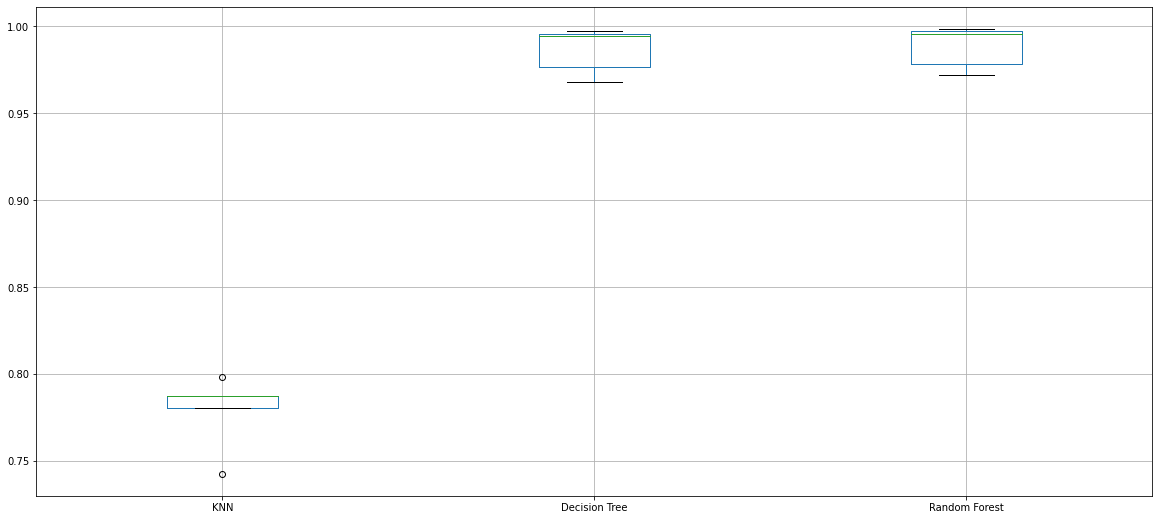

In [ ]:
metricas['precision_macro'].boxplot(figsize=(20,9))

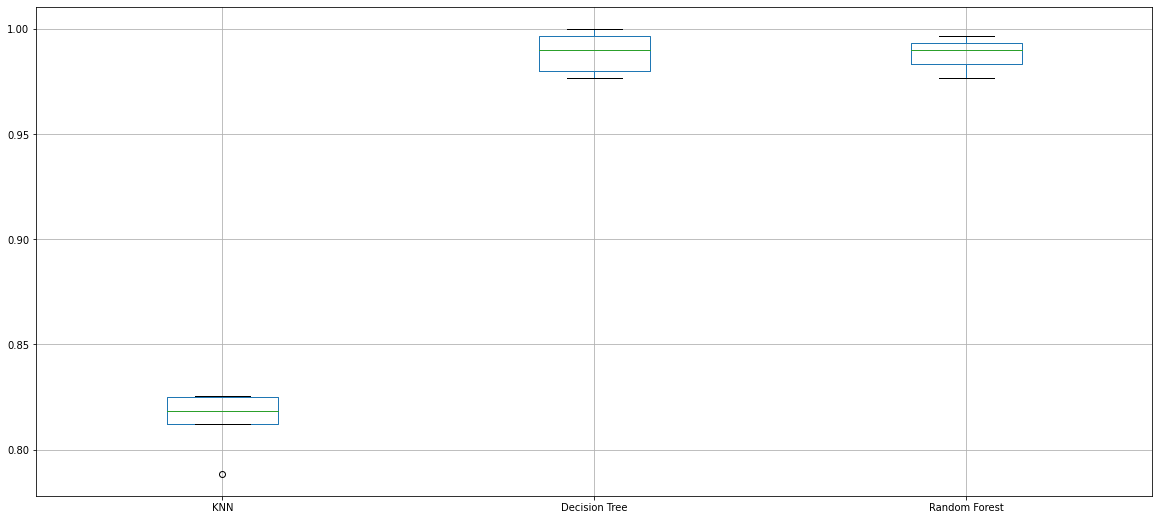

In [ ]:
metricas['accuracy'].boxplot(figsize=(20,9))

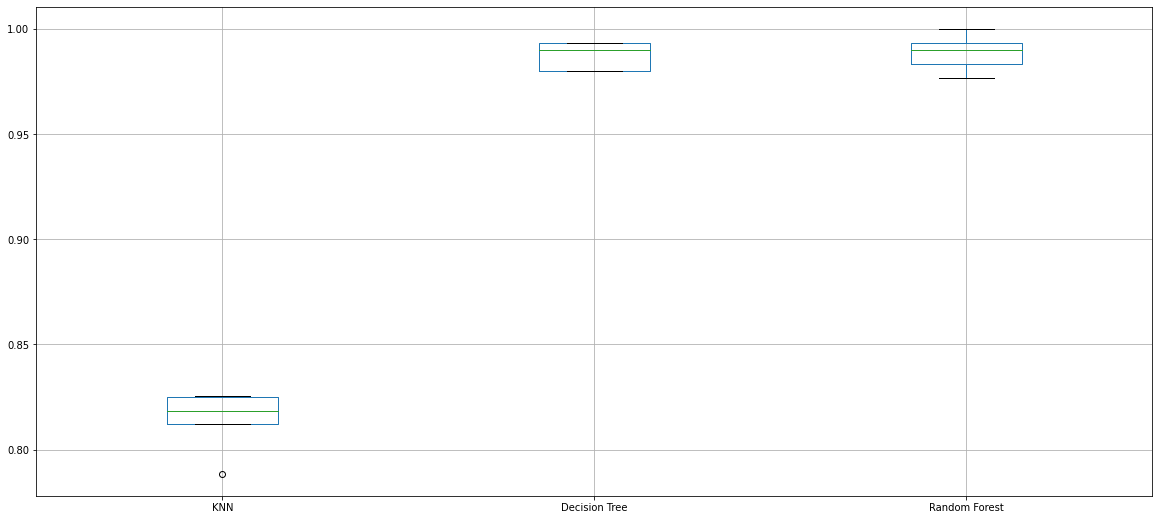

In [ ]:
 metricas['precision_micro'].boxplot(figsize=(20,9))

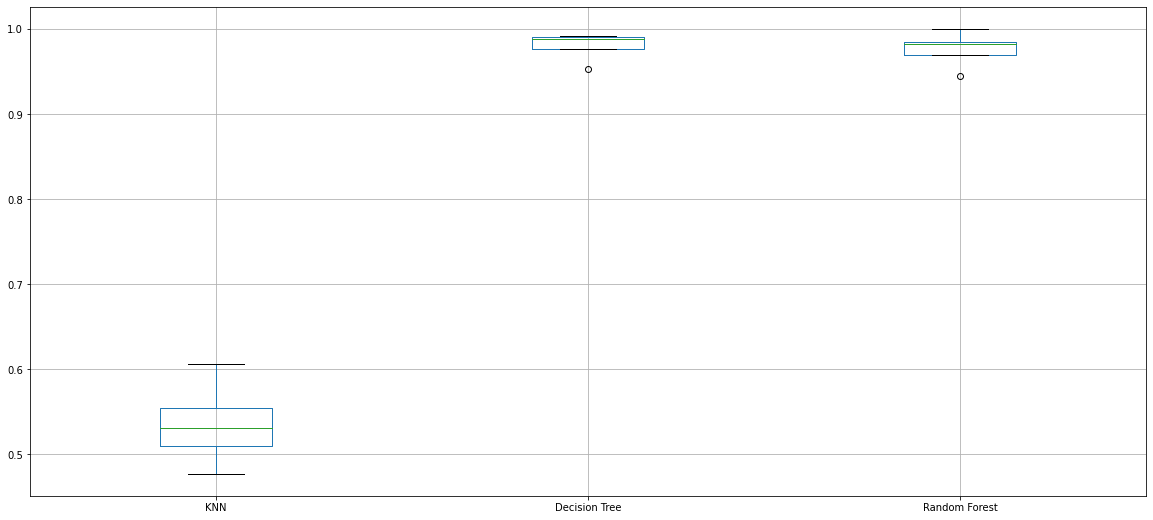

In [ ]:
metricas['recall_macro'].boxplot(figsize=(20,9))

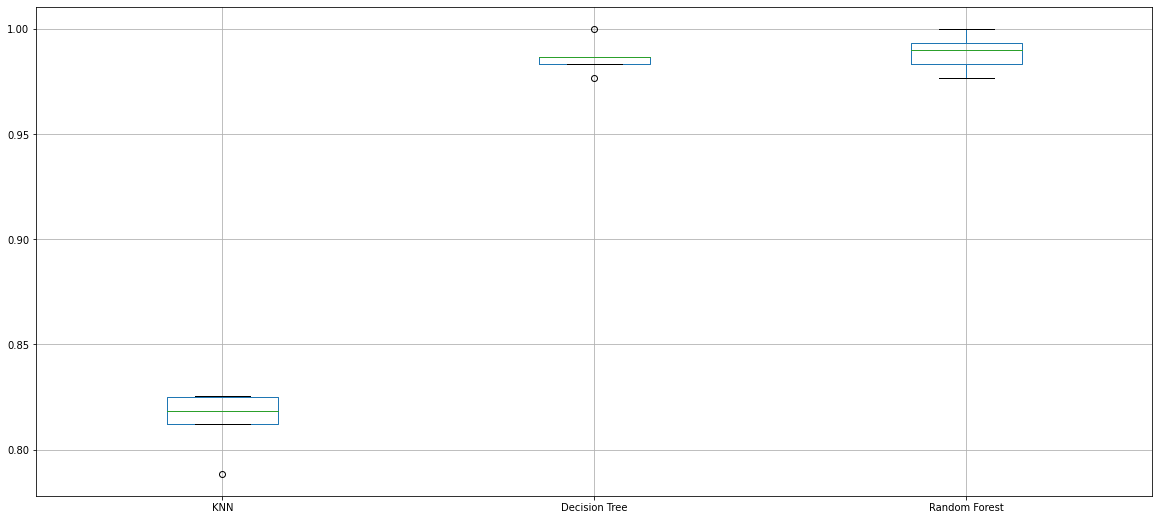

In [ ]:
metricas['recall_micro'].boxplot(figsize=(20,9))